In [3]:
import pandas as pd

df = pd.read_csv('/content/Speed Dating Data_cleaned.csv')
display(df.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}

df['race_label'] = df['race'].map(race_mapping)
display(df[['race', 'race_label']].head())

,race,race_label
0,4.0,Asian/Pacific Islander/Asian-American
1,4.0,Asian/Pacific Islander/Asian-American
2,4.0,Asian/Pacific Islander/Asian-American
3,4.0,Asian/Pacific Islander/Asian-American
4,4.0,Asian/Pacific Islander/Asian-American


In [5]:
race_proportions = df['race_label'].value_counts(normalize=True) * 100
display(race_proportions.round(2))

,proportion
race_label,
European/Caucasian-American,57.33
Asian/Pacific Islander/Asian-American,23.09
Latino/Hispanic American,8.06
Other,6.14
Black/African American,5.37


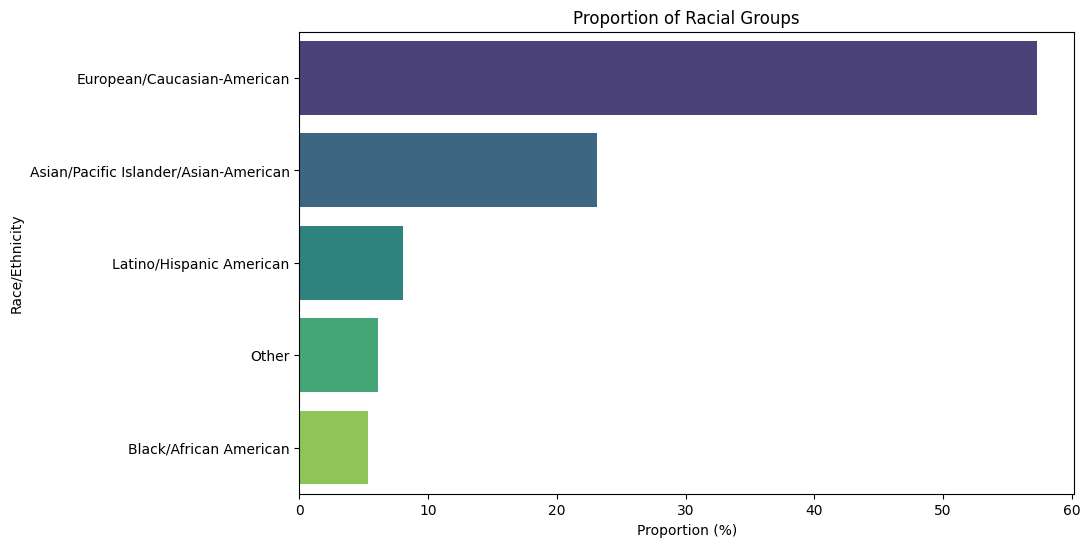

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a horizontal bar plot, addressing the FutureWarning by setting hue and legend
sns.barplot(x=race_proportions.values, y=race_proportions.index, ax=ax, palette='viridis', hue=race_proportions.index, legend=False)

# Set labels and title
ax.set_xlabel('Proportion (%)')
ax.set_ylabel('Race/Ethnicity')
ax.set_title('Proportion of Racial Groups')

# Display the plot
plt.show()

Unbalanced ethnicity proportion

**Let's try to answer our initial question without controling other confounding variables first to get a rough estimate**

Do white female prefer white male than Asian male?

A relative fair way of answering this question is:

For white females

$P(\text{yes} \mid \text{partner = Asian}) = \frac{\sum \text{dec for Asian partners}}{\# \text{Asian partners rated by White females}}$

$P(\text{yes} \mid \text{partner = White}) = \frac{\sum \text{dec for White partners}}{\# \text{White partners rated by White females}}$

In [13]:
df_white_fem = df[(df['gender'] == 0) & (df['race_label'] == 'European/Caucasian-American')]
display(df_white_fem.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,race_label
10,2,2.0,0,3,1,1,10,3,NaN,10,...,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American
11,2,2.0,0,3,1,1,10,3,NaN,9,...,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American
12,2,2.0,0,3,1,1,10,3,NaN,6,...,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American
13,2,2.0,0,3,1,1,10,3,NaN,1,...,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American
14,2,2.0,0,3,1,1,10,3,NaN,3,...,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American


In [18]:
df['partner_race_label'] = df['race_o'].map(race_mapping)
df_white_fem = df[(df['gender'] == 0) & (df['race_label'] == 'European/Caucasian-American')]

df_white_fem_asian_partners = df_white_fem[df_white_fem['partner_race_label'] == 'Asian/Pacific Islander/Asian-American']
display(df_white_fem_asian_partners.head())

total_asian_partners_rated = len(df_white_fem_asian_partners)
yes_decisions_asian_partners = df_white_fem_asian_partners['dec'].sum()
prop_yes_asian_partners = yes_decisions_asian_partners / total_asian_partners_rated

print(f"Total Asian partners rated by White females: {total_asian_partners_rated}")
print(f"'Yes' decisions for Asian partners: {yes_decisions_asian_partners}")
print(f"Proportion of 'yes' decisions for Asian partners: {prop_yes_asian_partners:.2f}")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,race_label,partner_race_label
12,2,2.0,0,3,1,1,10,3,NaN,6,...,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American
22,3,3.0,0,5,1,1,10,9,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American
32,4,4.0,0,7,1,1,10,6,NaN,9,...,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American
42,5,5.0,0,9,1,1,10,4,NaN,7,...,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American
72,8,8.0,0,15,1,1,10,10,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American


Total Asian partners rated by White females: 411
'Yes' decisions for Asian partners: 78.0
Proportion of 'yes' decisions for Asian partners: 0.19


In [19]:
df_white_fem_white_partners = df_white_fem[df_white_fem['partner_race_label'] == 'European/Caucasian-American']
display(df_white_fem_white_partners.head())

total_white_partners_rated = len(df_white_fem_white_partners)
yes_decisions_white_partners = df_white_fem_white_partners['dec'].sum()
prop_yes_white_partners = yes_decisions_white_partners / total_white_partners_rated

print(f"Total White partners rated by White females: {total_white_partners_rated}")
print(f"'Yes' decisions for White partners: {yes_decisions_white_partners}")
print(f"Proportion of 'yes' decisions for White partners: {prop_yes_white_partners:.2f}")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,race_label,partner_race_label
10,2,2.0,0,3,1,1,10,3,NaN,10,...,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American
11,2,2.0,0,3,1,1,10,3,NaN,9,...,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American
13,2,2.0,0,3,1,1,10,3,NaN,1,...,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American
15,2,2.0,0,3,1,1,10,3,NaN,2,...,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American
16,2,2.0,0,3,1,1,10,3,NaN,7,...,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American


Total White partners rated by White females: 1245
'Yes' decisions for White partners: 476.0
Proportion of 'yes' decisions for White partners: 0.38


**Reasoning**:
The proportions and counts for both Asian and White partners have been calculated. Now, I will create a new DataFrame to present these results in a clear and organized manner, as requested by the main task.



In [27]:
results_df = pd.DataFrame({
    'Partner Race': ['Asian/Pacific Islander/Asian-American', 'European/Caucasian-American'],
    'Total Partners Rated': [total_asian_partners_rated, total_white_partners_rated],
    'Yes Decisions': [yes_decisions_asian_partners, yes_decisions_white_partners],
    'Proportion of Yes Decisions': [prop_yes_asian_partners, prop_yes_white_partners]
})

display(results_df.round(2))

,Partner Race,Total Partners Rated,Yes Decisions,Proportion of Yes Decisions
0,Asian/Pacific Islander/Asian-American,411,78.0,0.19
1,European/Caucasian-American,1245,476.0,0.38


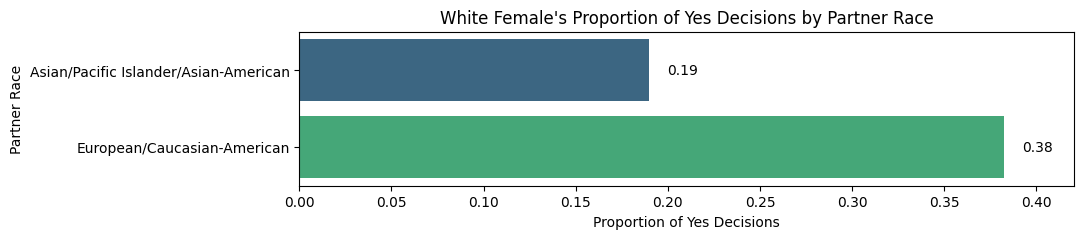

In [34]:


# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 2))

# Generate a horizontal bar plot using results_df
sns.barplot(x='Proportion of Yes Decisions', y='Partner Race', data=results_df, ax=ax, palette='viridis', hue='Partner Race', legend=False)

# Set labels and title
ax.set_xlabel('Proportion of Yes Decisions')
ax.set_ylabel('Partner Race')
ax.set_title('White Female\'s Proportion of Yes Decisions by Partner Race')

# Add proportion values on the bars for clarity
for index, row in results_df.iterrows():
    ax.text(row['Proportion of Yes Decisions'] + 0.01, index, f"{row['Proportion of Yes Decisions']:.2f}", color='black', ha="left", va='center')

# Adjust x-axis limit for better visualization
ax.set_xlim(0, max(results_df['Proportion of Yes Decisions']) * 1.1)

# Display the plot
plt.show()

In [21]:
df_white_male = df[(df['gender'] == 1) & (df['race_label'] == 'European/Caucasian-American')]
display(df_white_male.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,race_label,partner_race_label
100,11,1.0,1,2,1,1,10,7,NaN,4,...,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American
101,11,1.0,1,2,1,1,10,3,NaN,10,...,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American
102,11,1.0,1,2,1,1,10,9,NaN,6,...,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American
103,11,1.0,1,2,1,1,10,6,NaN,3,...,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American
104,11,1.0,1,2,1,1,10,4,NaN,1,...,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American


In [23]:
df['partner_gender'] = 1 - df['gender']
df_white_male = df[(df['gender'] == 1) & (df['race_label'] == 'European/Caucasian-American')]

df_white_male_asian_female_partners = df_white_male[(df_white_male['partner_race_label'] == 'Asian/Pacific Islander/Asian-American') & (df_white_male['partner_gender'] == 0)]
display(df_white_male_asian_female_partners.head())

total_asian_female_partners_rated = len(df_white_male_asian_female_partners)
yes_decisions_asian_female_partners = df_white_male_asian_female_partners['dec'].sum()
prop_yes_asian_female_partners = yes_decisions_asian_female_partners / total_asian_female_partners_rated

print(f"Total Asian female partners rated by White males: {total_asian_female_partners_rated}")
print(f"'Yes' decisions for Asian female partners: {yes_decisions_asian_female_partners}")
print(f"Proportion of 'yes' decisions for Asian female partners: {prop_yes_asian_female_partners:.2f}")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,race_label,partner_race_label,partner_gender
100,11,1.0,1,2,1,1,10,7,NaN,4,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0
105,11,1.0,1,2,1,1,10,8,NaN,5,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0
106,11,1.0,1,2,1,1,10,5,NaN,2,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0
110,12,2.0,1,4,1,1,10,7,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0
115,12,2.0,1,4,1,1,10,8,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0


Total Asian female partners rated by White males: 526
'Yes' decisions for Asian female partners: 208.0
Proportion of 'yes' decisions for Asian female partners: 0.40


**Reasoning**:
Now that the proportion for Asian female partners has been calculated, I will proceed to calculate the proportion of 'yes' decisions for White female partners by white males. This involves filtering `df_white_male` for partners who are White and female, summing 'dec', and dividing by the total number of such partners rated.



In [24]:
df_white_male_white_female_partners = df_white_male[(df_white_male['partner_race_label'] == 'European/Caucasian-American') & (df_white_male['partner_gender'] == 0)]
display(df_white_male_white_female_partners.head())

total_white_female_partners_rated = len(df_white_male_white_female_partners)
yes_decisions_white_female_partners = df_white_male_white_female_partners['dec'].sum()
prop_yes_white_female_partners = yes_decisions_white_female_partners / total_white_female_partners_rated

print(f"Total White female partners rated by White males: {total_white_female_partners_rated}")
print(f"'Yes' decisions for White female partners: {yes_decisions_white_female_partners}")
print(f"Proportion of 'yes' decisions for White female partners: {prop_yes_white_female_partners:.2f}")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,race_label,partner_race_label,partner_gender
101,11,1.0,1,2,1,1,10,3,NaN,10,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American,0
102,11,1.0,1,2,1,1,10,9,NaN,6,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American,0
103,11,1.0,1,2,1,1,10,6,NaN,3,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American,0
104,11,1.0,1,2,1,1,10,4,NaN,1,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American,0
107,11,1.0,1,2,1,1,10,10,NaN,7,...,7.0,5.0,NaN,NaN,NaN,NaN,NaN,European/Caucasian-American,European/Caucasian-American,0


Total White female partners rated by White males: 1245
'Yes' decisions for White female partners: 600.0
Proportion of 'yes' decisions for White female partners: 0.48


**Reasoning**:
Both proportions for Asian female and White female partners for white males have been calculated. Now, I will create a new DataFrame to present these results in a clear and organized manner, as requested by the main task, and then summarize the findings.



In [25]:
results_df_white_male = pd.DataFrame({
    'Partner Race': ['Asian/Pacific Islander/Asian-American', 'European/Caucasian-American'],
    'Total Female Partners Rated': [total_asian_female_partners_rated, total_white_female_partners_rated],
    'Yes Decisions': [yes_decisions_asian_female_partners, yes_decisions_white_female_partners],
    'Proportion of Yes Decisions': [prop_yes_asian_female_partners, prop_yes_white_female_partners]
})

display(results_df_white_male.round(2))

,Partner Race,Total Female Partners Rated,Yes Decisions,Proportion of Yes Decisions
0,Asian/Pacific Islander/Asian-American,526,208.0,0.40
1,European/Caucasian-American,1245,600.0,0.48


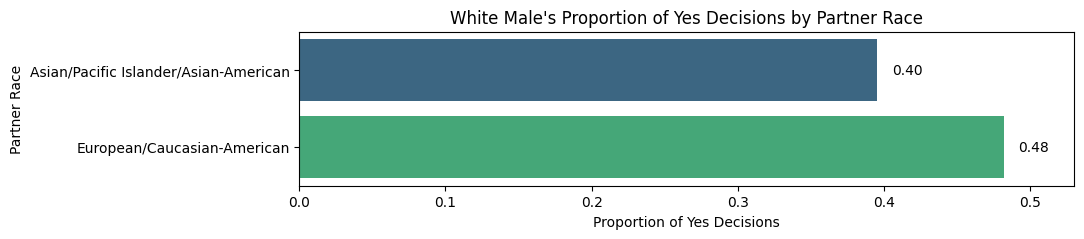

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 2
                                ))

# Generate a horizontal bar plot using results_df_white_male
sns.barplot(x='Proportion of Yes Decisions', y='Partner Race', data=results_df_white_male, ax=ax, palette='viridis', hue='Partner Race', legend=False)

# Set labels and title
ax.set_xlabel('Proportion of Yes Decisions')
ax.set_ylabel('Partner Race')
ax.set_title('White Male\'s Proportion of Yes Decisions by Partner Race')

# Add proportion values on the bars for clarity
for index, row in results_df_white_male.iterrows():
    ax.text(row['Proportion of Yes Decisions'] + 0.01, index, f"{row['Proportion of Yes Decisions']:.2f}", color='black', ha="left", va='center')

# Adjust x-axis limit for better visualization
ax.set_xlim(0, max(results_df_white_male['Proportion of Yes Decisions']) * 1.1)

# Display the plot
plt.show()